# Customer Service Requests Analysis

## Project_02

### 1. Import a 311 NYC service request.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# removing the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
customer_report = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [4]:
# To see all the columns of the data set
pd.set_option('display.max_columns', None)

In [5]:
customer_report.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
customer_report.shape

(300698, 53)

In [7]:
customer_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

### 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype 

In [8]:
# Data type of the "created date" and "closed data" 
customer_report[['Created Date', 'Closed Date']].dtypes

Created Date    object
Closed Date     object
dtype: object

In [9]:
# conversion into the data time format
customer_report['Created Date'] = pd.to_datetime(customer_report['Created Date'])
customer_report['Closed Date'] = pd.to_datetime(customer_report['Closed Date'])
# Now created date and closed date datatype after conversion
customer_report[['Created Date', 'Closed Date']].dtypes

Created Date    datetime64[ns]
Closed Date     datetime64[ns]
dtype: object

### 2. create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [10]:
customer_report['Request_Closing_Time'] = customer_report['Closed Date']-customer_report['Created Date']

In [11]:
customer_report['Request_Closing_Time'].head()

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

Before getting the insight first cleaning of data set and treatment of missing value for better result.

In [12]:
customer_report.isnull().apply(pd.value_counts).T

,False,True
Unique Key,300698.0,NaN
Created Date,300698.0,NaN
Closed Date,298534.0,2164.0
Agency,300698.0,NaN
Agency Name,300698.0,NaN
Complaint Type,300698.0,NaN
Descriptor,294784.0,5914.0
Location Type,300567.0,131.0
Incident Zip,298083.0,2615.0
Incident Address,256288.0,44410.0


In [13]:
# Droping all the row that have all the null value and throught the same value. 
customer_report.drop(['Ferry Terminal Name', 'Ferry Direction', 'Garage Lot Name', 'Bridge Highway Segment', 'Road Ramp', 
                      'Bridge Highway Direction', 'Bridge Highway Name', 'Taxi Pick Up Location', 'Taxi Company Borough',
                     'Vehicle Type', 'School or Citywide Complaint', 'Landmark', 'Intersection Street 2',
                      'Intersection Street 1', 'School Region', 'School Code', 'School Zip', 'Facility Type', 
                      'School Not Found', 'School State', 'School City', 'School Address', 'School Phone Number',
                     'School Number', 'School Name', 'Park Facility Name'], axis=1, inplace=True)

In [14]:
customer_report.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Address Type,City,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,ADDRESS,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,ADDRESS,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,ADDRESS,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,ADDRESS,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ADDRESS,ELMHURST,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


In [15]:
customer_report.dropna(subset = ['Location', 'Y Coordinate (State Plane)', 'Closed Date'], axis=0, inplace=True)

###  3. Four major conclusions after generic data mining.

In [16]:
# Conclusion 1 is that all type of complaint is under the one agency.
customer_report['Agency'].value_counts()

NYPD    297102
Name: Agency, dtype: int64

In [17]:
# Conclusion 2 is grouping the comlplaint type according to city to know the complaint in individual city.
City_wise_complaint = customer_report.groupby(['City', 'Complaint Type']).size().sort_values(ascending=False)
City_wise_complaint.to_frame('Counts')

Counts
City            Complaint Type                  
BROOKLYN        Blocked Driveway           28136
                Illegal Parking            27401
NEW YORK        Noise - Street/Sidewalk    20268
                Noise - Commercial         14530
BROOKLYN        Noise - Street/Sidewalk    13317
...                                          ...
FAR ROCKAWAY    Disorderly Youth               1
JACKSON HEIGHTS Posting Advertisement          1
                Panhandling                    1
FAR ROCKAWAY    Noise - House of Worship       1
LITTLE NECK     Drinking                       1

[763 rows x 1 columns]

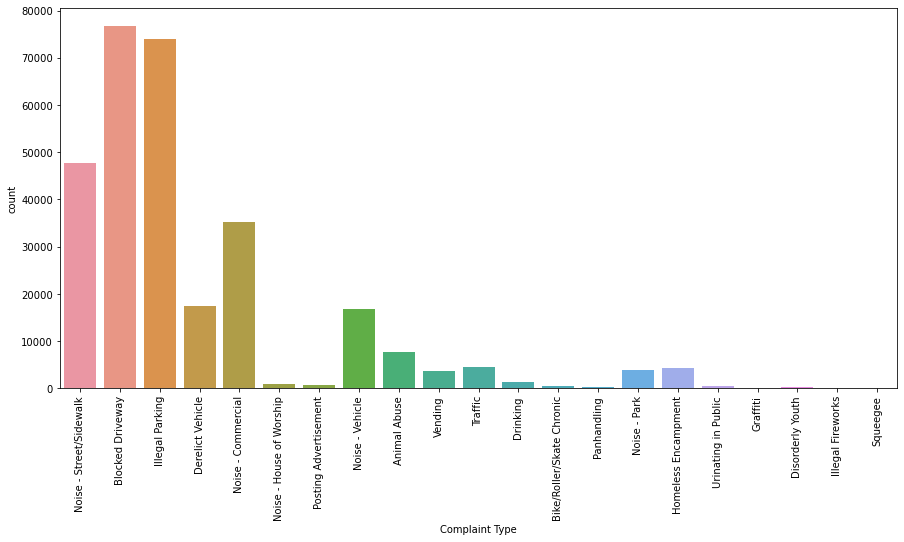

In [18]:
# By the bar plot showing the count of the varipus type of complaint.
plt.figure(figsize = (15,7))
sns.countplot(x = 'Complaint Type', data = customer_report)
plt.xticks(rotation = 90)
plt.show()

In [19]:
# number of city will show that how many time complaint registered in that city.
customer_report['City'].value_counts().head(10)

BROOKLYN         98101
NEW YORK         65380
BRONX            40590
STATEN ISLAND    12330
JAMAICA           7284
ASTORIA           6315
FLUSHING          5966
RIDGEWOOD         5160
CORONA            4294
WOODSIDE          3541
Name: City, dtype: int64

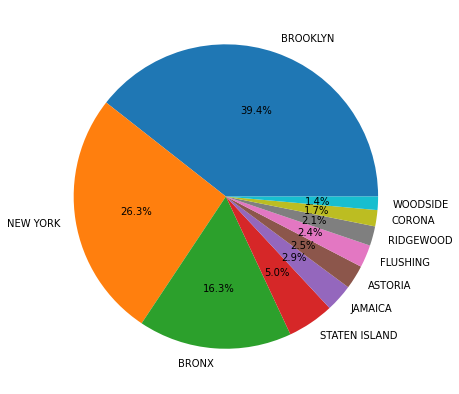

In [20]:
# We will examine the how percent of complaint from which city.
plt.figure(figsize=(15,7))
plt.pie(customer_report['City'].value_counts().head(10), labels=customer_report['City'].value_counts().head(10).keys(),
        autopct= '%0.01f%%')
plt.show()

### 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [21]:
pd.DataFrame(customer_report.groupby(['City','Complaint Type'])['Request_Closing_Time'].mean()).sort_values('Request_Closing_Time')

,,Request_Closing_Time
City,Complaint Type,
ROSEDALE,Graffiti,0 days 00:09:23
ARVERNE,Drinking,0 days 00:14:19
RIDGEWOOD,Posting Advertisement,0 days 00:14:55
EAST ELMHURST,Bike/Roller/Skate Chronic,0 days 00:15:08
OZONE PARK,Illegal Fireworks,0 days 00:19:00
...,...,...
FLORAL PARK,Animal Abuse,1 days 02:34:56.500000
OAKLAND GARDENS,Homeless Encampment,1 days 04:39:00
SOUTH RICHMOND HILL,Bike/Roller/Skate Chronic,1 days 06:54:37


## 5.  Hypothesis Testing

### Whether the average response time across complaint types is similar or not (overall)

In [22]:
from scipy import stats
from scipy.stats import ttest_1samp

<AxesSubplot:>

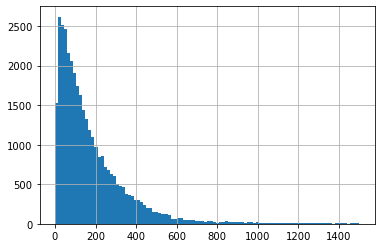

In [29]:
cmplt = customer_report[customer_report['Complaint Type']=='Noise - Commercial']['Request_Closing_Time']
cmplt.hist(bins=100, range=(0,1500))

In [30]:
# We have to compare more then two group so we will perform the ANOVA test.
# As we saw above data is skewed so we first appli log distribution then anova test.

In [23]:
customer_report['Request_Closing_Time'] = customer_report['Request_Closing_Time'].astype('timedelta64[m]')+1

In [32]:
data = {}
for complaint in customer_report['Complaint Type'].unique():
    data[complaint] = np.log(customer_report[customer_report['Complaint Type']==complaint]['Request_Closing_Time'])

<AxesSubplot:>

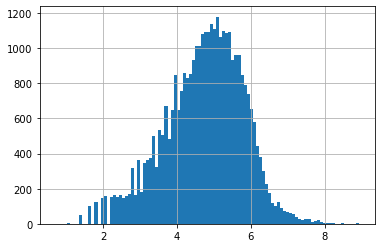

In [35]:
data['Noise - Commercial'].hist(bins=100)

In [36]:
# data is normal distributed so now we will perform the hypotesis testing

In [37]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee'])

In [42]:
from scipy.stats import f_oneway

stat , p = f_oneway(data['Noise - Street/Sidewalk'], data['Blocked Driveway'], data['Illegal Parking'],
                   data['Derelict Vehicle'], data['Noise - Commercial'], data['Noise - House of Worship'],
                   data['Posting Advertisement'], data['Noise - Vehicle'], data['Animal Abuse'])

print(stat,p)

alpha = 0.05

if p> alpha:
    print('distribution is same so, hypothesis is accepted')
else:
    print('distribution is not same so, hypothesis is not accepted')

1390.664409922275 0.0
distribution is not same so, hypothesis is not accepted


### Are the type of complaint or service requested and location related?

In [43]:
# We have to saw the relation between the complaint and location so we will select usefull column and get there correlation.

In [44]:
relation = customer_report[['Complaint Type','Borough','Longitude','Latitude','City']]

In [45]:
relation.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,Noise - Street/Sidewalk,MANHATTAN,-73.923501,40.865682,NEW YORK
1,Blocked Driveway,QUEENS,-73.915094,40.775945,ASTORIA
2,Blocked Driveway,BRONX,-73.888525,40.870325,BRONX
3,Illegal Parking,BRONX,-73.828379,40.835994,BRONX
4,Illegal Parking,QUEENS,-73.874170,40.733060,ELMHURST


In [51]:
# We have to convert these category for finding the corelation.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
relation['Complaint Type'] = le.fit_transform(relation['Complaint Type'])
relation['Borough'] = le.fit_transform(relation['Borough'])
relation['City'] = le.fit_transform(relation['City'])

In [52]:
relation.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,13,2,-73.923501,40.865682,33
1,2,3,-73.915094,40.775945,1
2,2,0,-73.888525,40.870325,6
3,9,0,-73.828379,40.835994,6
4,9,3,-73.874170,40.733060,13


In [53]:
relation.corr()

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.067017,-0.182703,0.154089,0.095580
Borough,-0.067017,1.000000,0.021363,-0.249488,0.717787
Longitude,-0.182703,0.021363,1.000000,0.364962,-0.124244
Latitude,0.154089,-0.249488,0.364962,1.000000,-0.000567
City,0.095580,0.717787,-0.124244,-0.000567,1.000000


In [54]:
# We can clearly seen that the value between location and complaint type is near to zero so there is no relation between them.